In [1]:
import matplotlib.pyplot as plt
import numpy as np
import csv
from scipy.optimize import curve_fit
import sys

In [2]:
# threshold = sys.maxsize
threshold = 1e10
file_name_with_preprocessing = (
    "./data/preprocessing_" + str(int(threshold)) + "_results.csv"
)
file_name_no_processing = f"./data/no_preprocessing{int(threshold)}.csv"


In [25]:
qubits_required_with_preprocessing = []

maxpow = 54

file_name_with_preprocessing = f"./data_processing/preprocessing_{maxpow}_results.csv"

with open(file_name_with_preprocessing, 'r') as csvfile:
    # creating a csv reader object
    csvreader = csv.reader(csvfile)
    header = next(csvreader)
    # qubits_required_with_preprocessing.append(header)
    # extracting each data row one by one
    for row in csvreader:
        int_row = [int(i) for i in row]
        qubits_required_with_preprocessing.append(int_row)


In [33]:
plot_name = f"./reprocessing_{maxpow}_plot.png"

data_2 = np.asarray(qubits_required_with_preprocessing)
biprimes = data_2[:,2]
qubits  =data_2[:,4]

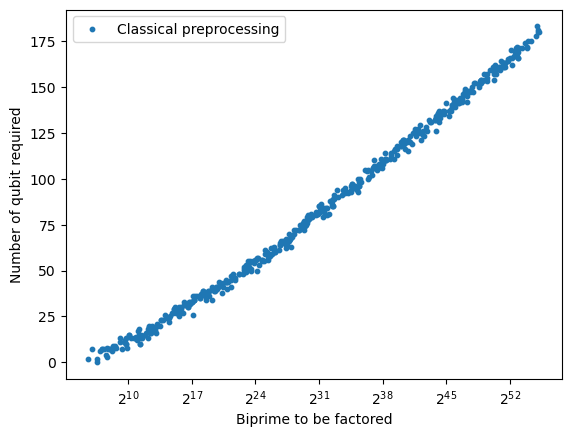

In [34]:

fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(biprimes, qubits, label="Classical preprocessing", s=10)

ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale("log", base=2)
# ax.set_xscale('symlog', base=2)
plt.legend()
plt.savefig(plot_name)
plt.show()

In [35]:
def exp_func(x, a, b, c):
    return a * np.power(x, b) + c

/tmp/ipykernel_46833/3929646321.py:11: RuntimeWarning: divide by zero encountered in log2
  exp_func(np.log2(qubits), *popt),


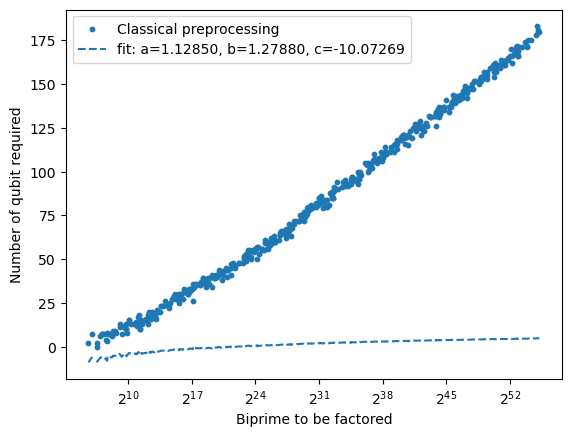

In [37]:
fig = plt.figure()
ax = fig.add_subplot(1, 1, 1)

# ax.scatter(data_1[:, 0], data_1[:, 1], label="No classical preprocessing", s=10)
ax.scatter(biprimes, qubits, label="Classical preprocessing", s=10)

popt, pcov = curve_fit(exp_func, np.log2(biprimes), qubits)

plt.plot(
    biprimes,
    exp_func(np.log2(qubits), *popt),
    "--",
    label="fit: a=%5.5f, b=%5.5f, c=%5.5f" % tuple(popt),
)

ax.set_xlabel("Biprime to be factored")
ax.set_ylabel("Number of qubit required")
ax.set_xscale("log", base=2)
plt.legend()
plt.savefig(plot_name)
plt.show()

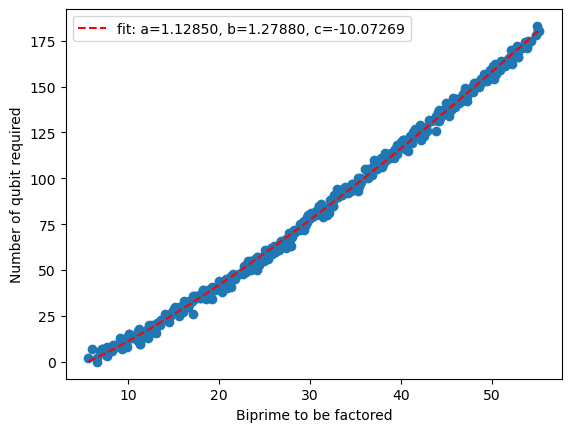

In [38]:
xdata = np.log2(biprimes)
ydata = qubits

popt, pcov = curve_fit(exp_func, xdata, ydata)

plt.scatter(xdata, ydata)
plt.plot(
    xdata,
    exp_func(xdata, *popt),
    "r--",
    label="fit: a=%5.5f, b=%5.5f, c=%5.5f" % tuple(popt),
)
plt.xlabel("Biprime to be factored")
plt.ylabel("Number of qubit required")
plt.legend()
plt.show()

In [39]:
num_of_chunks = 5
xdata_split = np.array_split(xdata, num_of_chunks)
ydata_split = np.array_split(ydata, num_of_chunks)

In [40]:
partial_fit = []
for i in range(num_of_chunks):
    # print(len(xdata_split[i]) == len(ydata_split[i]))
    x = xdata_split[i]
    y = ydata_split[i]

    interval_start = 2 ** int(x[0])
    interval_end = 2 ** int(x[-1])

    try:

        popt, pcov = curve_fit(exp_func, x, y)

        a = popt[0]
        b = popt[1]
        c = popt[2]

        partial_fit.append([interval_start, interval_end, b])

    except:
        partial_fit.append([interval_start, interval_end, "missing"])
        continue

In [41]:
for i in partial_fit:
    print(i)

[32, 131072, 1.9363233025155506]
[131072, 67108864, 1.616288468655048]
[67108864, 34359738368, 'missing']
[34359738368, 35184372088832, 'missing']
[35184372088832, 36028797018963968, 'missing']
